In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
#Sampling frequency
fs = 10e3
#Number of time points
N = 1e5
#Signal amplitude
amp = 2 * np.sqrt(2)
#Noise amplitude
noise_power = 0.01 * fs / 2
#Time axis
time = np.arange(N) / float(fs)
#Modulation
mod = 500*np.cos(2*np.pi*0.25*time)
#Carrier wave
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
#Random normal distribution values with a decaying amplitude in time
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
#Final signal
sig = carrier + noise

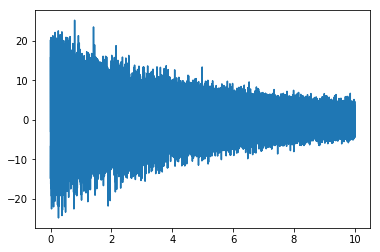

In [14]:
plt.plot(time, sig)
#plt.xlim([2,2.5])
plt.show()

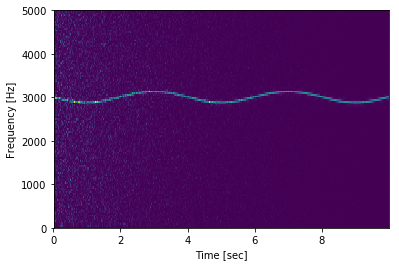

In [15]:
f, t, Sxx = signal.spectrogram(sig, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [13]:
import webbrowser
url = 'https://docs.scipy.org/doc/scipy/reference/signal.html'
webbrowser.open_new_tab(url)

True

# Design a Butterworth filter and apply it to a signal

Let's see a functional example of a widespread technique in Reflectometry.

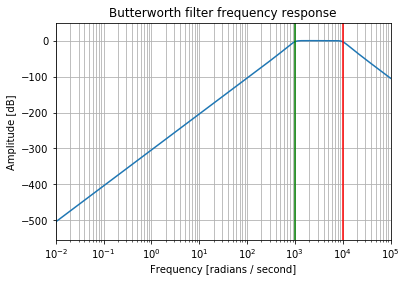

In [33]:
#Returns Numerator b and Denominator a of the filter
cutoff_low = 1000
cutoff_high = 10000
order = 5
b, a = signal.butter(5, (cutoff_low, cutoff_high), 'bandpass', analog=True)
#Use fifth order: A. Silva, RSI 2006, one of IPFN's works with most citations in Fusion
#See the filter response
w, h = signal.freqs(b, a)
#From now on, it's just plotting
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(cutoff_low, color='green') # low cutoff frequency
plt.axvline(cutoff_high, color='red') # cutoff frequency
plt.show()

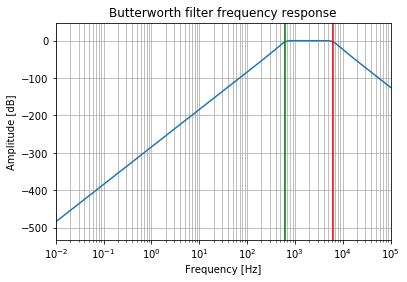

In [89]:
#Returns Numerator b and Denominator a of the filter
#Convert radians to Hz
cutoff_low = 100 * 2.0 *np.pi
cutoff_high = 1000 * 2.0 *np.pi
order = 5
b, a = signal.butter(5, (cutoff_low, cutoff_high), 'bandpass', analog=True)
#Use fifth order: A. Silva, RSI 2006, one of IPFN's works with most citations in Fusion
#See the filter response
w, h = signal.freqs(b, a)
#From now on, it's just plotting
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(cutoff_low, color='green') # low cutoff frequency
plt.axvline(cutoff_high, color='red') # cutoff frequency
plt.show()

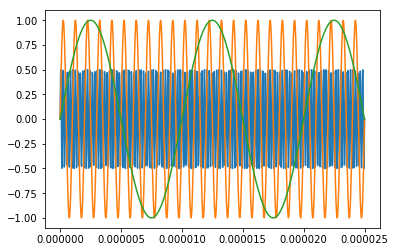

In [134]:
fs = 40e6 * 2.0 * np.pi
#100 kHz
fs1 = 1e5 * 2.0 * np.pi
#1 MHz
fs2 = 1e6 * 2.0 * np.pi
#5 MHz
fs3 =5e6 * 2.0 * np.pi
##Time axis
t = np.linspace(0, 25e-6, 1024)
##All signals
##Sig
sig1 = 1.0 * np.sin(fs1*t)
sig2 = 1.0 * np.sin(fs2*t)
sig3 = 0.5 * np.sin(fs3*t)
plt.plot(t,sig3)
plt.plot(t,sig2)
plt.plot(t,sig1)
plt.show()

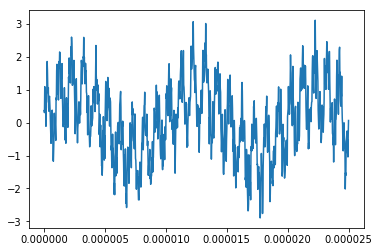

In [151]:
##Sig
sig = sig1 + sig2 + sig3 + 0.3 * np.random.randn(len(t))
plt.plot(t,sig)
plt.show()

In [152]:
coff_low = 5e5 * 2.0 * np.pi/fs
coff_hi = 5e6 * 2.0 * np.pi/fs
print coff_low, coff_hi

0.0125 0.125


In [153]:
b, a = signal.butter(5, (coff_low, coff_hi), 'bandpass')

In [154]:
print b

[ 0.00010213  0.         -0.00051066  0.          0.00102132  0.
 -0.00102132  0.          0.00051066  0.         -0.00010213]


In [155]:
print a

[   1.           -8.78902021   34.85874006  -82.1727025   127.5140708
 -136.11970916  101.23772691  -51.80234125   17.45345203   -3.49648802
    0.31627133]


In [156]:
fsig = signal.lfilter(b, a, sig)

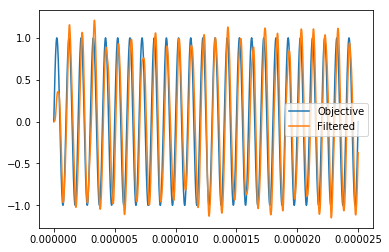

In [157]:
#plt.plot(t, sig, label='Original')
plt.plot(t, sig2, label='Objective')
plt.plot(t, fsig, label='Filtered')
plt.legend()
plt.show()

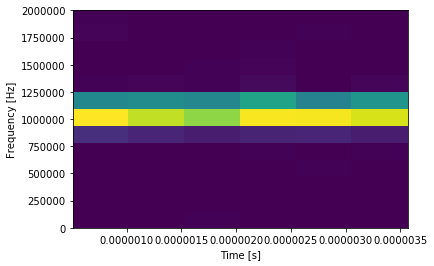

In [163]:
freq, time, Sxx = signal.spectrogram(fsig, fs, nfft=256, noverlap=128, window='hanning')
plt.pcolormesh(time, freq/(2.0*np.pi), Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.ylim([0,2e6])
plt.show()